<a href="https://colab.research.google.com/github/mkane968/Text-Mining-Experiments/blob/main/NLTK/Tutorial%202%3A%20Modules%20for%20Language_Identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tutorial 2: Modules for Language Identification 
# (N-Gram, Stopword and Word Bigram Analysis)

**Tutorial 2.1: Deriving N-Grams from Text**

Based on [N-Gram-Based Text Categorization: Categorizing Text With Python by Alejandro Nolla](http://blog.alejandronolla.com/2013/05/20/n-gram-based-text-categorization-categorizing-text-with-python/)

What are n-grams? See [here](https://cloudmark.github.io/Language-Detection/).

***Tokenization:*** Divides strings of text into substrings of letters and apostrophes ONLY to prepare for n-gram analysis

In [1]:
#Lowercase text in string
s = "Le temps est un grand maître, dit-on, le malheur est qu'il tue ses élèves."
s = s.lower()

In [2]:
#Import regular expressions tokenizer and tokenize string
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer("[a-zA-Z'`éèî]+")
s_tokenized = tokenizer.tokenize(s)
s_tokenized

['le',
 'temps',
 'est',
 'un',
 'grand',
 'maître',
 'dit',
 'on',
 'le',
 'malheur',
 'est',
 "qu'il",
 'tue',
 'ses',
 'élèves']

***Generating N-Grams:*** Finds n-length slices of a longer string, typically overlapping/in sequence; can be used for language detection

In [ ]:
#import ngrams module and create list for generated ngrams
from nltk.util import ngrams
generated_4grams = []

#Generate ngram for each word in tokenized string
for word in s_tokenized:
    generated_4grams.append(list(ngrams(word, 4, pad_left=True, pad_right=True, left_pad_symbol='_', right_pad_symbol='_'))) # n = 4.
generated_4grams

It seems that generated_4grams needs flattening since it's supposed to be a list of 4-grams:

In [5]:
#Creates list in which ????
generated_4grams = [word for sublist in generated_4grams for word in sublist]
generated_4grams[:10]

[('_', '_', '_', 'l'),
 ('_', '_', 'l', 'e'),
 ('_', 'l', 'e', '_'),
 ('l', 'e', '_', '_'),
 ('e', '_', '_', '_'),
 ('_', '_', '_', 't'),
 ('_', '_', 't', 'e'),
 ('_', 't', 'e', 'm'),
 ('t', 'e', 'm', 'p'),
 ('e', 'm', 'p', 's')]

Obtaining n-grams (n = 4)

In [ ]:
#Join 4grams into list of strings
ng_list_4grams = generated_4grams
for idx, val in enumerate(generated_4grams):
    ng_list_4grams[idx] = ''.join(val)
ng_list_4grams

Sort n-grams by how frequently they appear within the text

In [ ]:
#Create list for n-grams sorted by frequency
freq_4grams = {}

#Iterate through ngrams and add to freq_4grams list as many times as appearing in list of strings
for ngram in ng_list_4grams:
    if ngram not in freq_4grams:
        freq_4grams.update({ngram: 1})
    else:
        ngram_occurrences = freq_4grams[ngram]
        freq_4grams.update({ngram: ngram_occurrences + 1})
        
# The operator module exports a set of efficient functions corresponding to the intrinsic operators of Python. For example, operator.add(x, y) is equivalent to the expression x + y.
from operator import itemgetter 

# We only keep the 300 most popular n-grams. This was suggested in the original paper written about n-grams.
freq_4grams_sorted = sorted(freq_4grams.items(), key=itemgetter(1), reverse=True)[0:300] 
freq_4grams_sorted

Obtain n-grams for multiple values of n (n = 1, 2, 3, 4)

In [8]:
from nltk import everygrams

# For the code below we need the raw sentence as opposed to the tokens.
s_clean = ' '.join(s_tokenized) 
s_clean

"le temps est un grand maître dit on le malheur est qu'il tue ses élèves"

In [11]:
#Define ngram extractor generating uni-grams, bigrams, trigrams and 4-grams of string (range set to 1-4)
def ngram_extractor(sent):
    return [''.join(ng) for ng in everygrams(sent.replace(' ', '_ _'), 1, 4) 
            if ' ' not in ng and '\n' not in ng and ng != ('_',)]

ngram_extractor(s_clean)

['l',
 'e',
 't',
 'e',
 'm',
 'p',
 's',
 'e',
 's',
 't',
 'u',
 'n',
 'g',
 'r',
 'a',
 'n',
 'd',
 'm',
 'a',
 'î',
 't',
 'r',
 'e',
 'd',
 'i',
 't',
 'o',
 'n',
 'l',
 'e',
 'm',
 'a',
 'l',
 'h',
 'e',
 'u',
 'r',
 'e',
 's',
 't',
 'q',
 'u',
 "'",
 'i',
 'l',
 't',
 'u',
 'e',
 's',
 'e',
 's',
 'é',
 'l',
 'è',
 'v',
 'e',
 's',
 'le',
 'e_',
 '_t',
 'te',
 'em',
 'mp',
 'ps',
 's_',
 '_e',
 'es',
 'st',
 't_',
 '_u',
 'un',
 'n_',
 '_g',
 'gr',
 'ra',
 'an',
 'nd',
 'd_',
 '_m',
 'ma',
 'aî',
 'ît',
 'tr',
 're',
 'e_',
 '_d',
 'di',
 'it',
 't_',
 '_o',
 'on',
 'n_',
 '_l',
 'le',
 'e_',
 '_m',
 'ma',
 'al',
 'lh',
 'he',
 'eu',
 'ur',
 'r_',
 '_e',
 'es',
 'st',
 't_',
 '_q',
 'qu',
 "u'",
 "'i",
 'il',
 'l_',
 '_t',
 'tu',
 'ue',
 'e_',
 '_s',
 'se',
 'es',
 's_',
 '_é',
 'él',
 'lè',
 'èv',
 've',
 'es',
 'le_',
 '_te',
 'tem',
 'emp',
 'mps',
 'ps_',
 '_es',
 'est',
 'st_',
 '_un',
 'un_',
 '_gr',
 'gra',
 'ran',
 'and',
 'nd_',
 '_ma',
 'maî',
 'aît',
 'îtr',
 'tre',


**Tutorial 2.2: Detecting Text Language by Counting Stopwords** 

Based on [Detecting Text Language With Python and NLTK by Alejandro Nolla](http://blog.alejandronolla.com/2013/05/15/detecting-text-language-with-python-and-nltk/)

Stop words are words which are filtered out before processing because they are mostly grammatical as opposed to semantic in nature (e.g. search engines remove words like 'want')

In [12]:
#Tokenize text, regex-based tokenizer splitting text on whitespace and punctuation (except for underscore)
text = "Yo man, it's time for you to shut yo' mouth! I ain't even messin' dawg."
import sys

try:
    from nltk.tokenize import wordpunct_tokenize 
except ImportError:
    print('[!] You need to install nltk (http://nltk.org/index.html)')
test_tokens = wordpunct_tokenize(text)
test_tokens

['Yo',
 'man',
 ',',
 'it',
 "'",
 's',
 'time',
 'for',
 'you',
 'to',
 'shut',
 'yo',
 "'",
 'mouth',
 '!',
 'I',
 'ain',
 "'",
 't',
 'even',
 'messin',
 "'",
 'dawg',
 '.']

There are other tokenizers e.g. RegexpTokenizer where you can enter your own regexp, WhitespaceTokenizer (similar to Python's string.split()) and BlanklineTokenizer.

**Exploring NLTK Stopword Corpus** 

NLTK comes with a corpus of stop words in various languages.

In [14]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
# Since this is raw text, we need to replace \n's with spaces for it to be readable.
stopwords.readme().replace('\n', ' ') 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


'Stopwords Corpus  This corpus contains lists of stop words for several languages.  These are high-frequency grammatical words which are usually ignored in text retrieval applications.  They were obtained from: http://anoncvs.postgresql.org/cvsweb.cgi/pgsql/src/backend/snowball/stopwords/  The stop words for the Romanian language were obtained from: http://arlc.ro/resources/  The English list has been augmented https://github.com/nltk/nltk_data/issues/22  The German list has been corrected https://github.com/nltk/nltk_data/pull/49  A Kazakh list has been added https://github.com/nltk/nltk_data/pull/52  A Nepali list has been added https://github.com/nltk/nltk_data/pull/83  An Azerbaijani list has been added https://github.com/nltk/nltk_data/pull/100  A Greek list has been added https://github.com/nltk/nltk_data/pull/103  An Indonesian list has been added https://github.com/nltk/nltk_data/pull/112 '

In [16]:
# Most corpora consist of a set of files, each containing a piece of text. A list of identifiers for these files is accessed via fileids(). Here you can see the list of languages the corpus contains
stopwords.fileids() 

['arabic',
 'azerbaijani',
 'bengali',
 'danish',
 'dutch',
 'english',
 'finnish',
 'french',
 'german',
 'greek',
 'hungarian',
 'indonesian',
 'italian',
 'kazakh',
 'nepali',
 'norwegian',
 'portuguese',
 'romanian',
 'russian',
 'slovene',
 'spanish',
 'swedish',
 'tajik',
 'turkish']

In [17]:
#Explore raw corpus of Greek stopwords
stopwords.raw('greek')

"αλλα\nαν\nαντι\nαπο\nαυτα\nαυτεσ\nαυτη\nαυτο\nαυτοι\nαυτοσ\nαυτουσ\nαυτων\nαἱ\nαἳ\nαἵ\nαὐτόσ\nαὐτὸς\nαὖ\nγάρ\nγα\nγα^\nγε\nγια\nγοῦν\nγὰρ\nδ'\nδέ\nδή\nδαί\nδαίσ\nδαὶ\nδαὶς\nδε\nδεν\nδι'\nδιά\nδιὰ\nδὲ\nδὴ\nδ’\nεαν\nειμαι\nειμαστε\nειναι\nεισαι\nειστε\nεκεινα\nεκεινεσ\nεκεινη\nεκεινο\nεκεινοι\nεκεινοσ\nεκεινουσ\nεκεινων\nενω\nεπ\nεπι\nεἰ\nεἰμί\nεἰμὶ\nεἰς\nεἰσ\nεἴ\nεἴμι\nεἴτε\nη\nθα\nισωσ\nκ\nκαί\nκαίτοι\nκαθ\nκαι\nκατ\nκατά\nκατα\nκατὰ\nκαὶ\nκι\nκἀν\nκἂν\nμέν\nμή\nμήτε\nμα\nμε\nμεθ\nμετ\nμετά\nμετα\nμετὰ\nμη\nμην\nμἐν\nμὲν\nμὴ\nμὴν\nνα\nο\nοι\nομωσ\nοπωσ\nοσο\nοτι\nοἱ\nοἳ\nοἷς\nοὐ\nοὐδ\nοὐδέ\nοὐδείσ\nοὐδεὶς\nοὐδὲ\nοὐδὲν\nοὐκ\nοὐχ\nοὐχὶ\nοὓς\nοὔτε\nοὕτω\nοὕτως\nοὕτωσ\nοὖν\nοὗ\nοὗτος\nοὗτοσ\nπαρ\nπαρά\nπαρα\nπαρὰ\nπερί\nπερὶ\nποια\nποιεσ\nποιο\nποιοι\nποιοσ\nποιουσ\nποιων\nποτε\nπου\nποῦ\nπρο\nπροσ\nπρόσ\nπρὸ\nπρὸς\nπως\nπωσ\nσε\nστη\nστην\nστο\nστον\nσόσ\nσύ\nσύν\nσὸς\nσὺ\nσὺν\nτά\nτήν\nτί\nτίς\nτίσ\nτα\nταῖς\nτε\nτην\nτησ\nτι\nτινα\nτις\nτισ\nτο\nτοί\nτοι\nτοιοῦτος\nτοιοῦτοσ\nτον\nτοτε\

In [18]:
#Clean Greek stopwards by \n with space
stopwords.raw('greek').replace('\n', ' ') # Better

"αλλα αν αντι απο αυτα αυτεσ αυτη αυτο αυτοι αυτοσ αυτουσ αυτων αἱ αἳ αἵ αὐτόσ αὐτὸς αὖ γάρ γα γα^ γε για γοῦν γὰρ δ' δέ δή δαί δαίσ δαὶ δαὶς δε δεν δι' διά διὰ δὲ δὴ δ’ εαν ειμαι ειμαστε ειναι εισαι ειστε εκεινα εκεινεσ εκεινη εκεινο εκεινοι εκεινοσ εκεινουσ εκεινων ενω επ επι εἰ εἰμί εἰμὶ εἰς εἰσ εἴ εἴμι εἴτε η θα ισωσ κ καί καίτοι καθ και κατ κατά κατα κατὰ καὶ κι κἀν κἂν μέν μή μήτε μα με μεθ μετ μετά μετα μετὰ μη μην μἐν μὲν μὴ μὴν να ο οι ομωσ οπωσ οσο οτι οἱ οἳ οἷς οὐ οὐδ οὐδέ οὐδείσ οὐδεὶς οὐδὲ οὐδὲν οὐκ οὐχ οὐχὶ οὓς οὔτε οὕτω οὕτως οὕτωσ οὖν οὗ οὗτος οὗτοσ παρ παρά παρα παρὰ περί περὶ ποια ποιεσ ποιο ποιοι ποιοσ ποιουσ ποιων ποτε που ποῦ προ προσ πρόσ πρὸ πρὸς πως πωσ σε στη στην στο στον σόσ σύ σύν σὸς σὺ σὺν τά τήν τί τίς τίσ τα ταῖς τε την τησ τι τινα τις τισ το τοί τοι τοιοῦτος τοιοῦτοσ τον τοτε του τούσ τοὺς τοῖς τοῦ των τό τόν τότε τὰ τὰς τὴν τὸ τὸν τῆς τῆσ τῇ τῶν τῷ ωσ ἀλλ' ἀλλά ἀλλὰ ἀλλ’ ἀπ ἀπό ἀπὸ ἀφ ἂν ἃ ἄλλος ἄλλοσ ἄν ἄρα ἅμα ἐάν ἐγώ ἐγὼ ἐκ ἐμόσ ἐμὸς ἐν ἐξ ἐπί ἐπεὶ 

In [19]:
#List first 10 English stopwords
stopwords.words('english')[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

We can also use .sents() which returns sentences. However, in our particular case, this will cause an error:

In [ ]:
stopwords.sents('greek')

The error is because the stopwords corpus reader is of type WordListCorpusReader so there are no sentences. It's the same for .paras().

In [21]:
# Count number of stopwords in English and Greek. There is a total of 444 Greek and English stop words
len(stopwords.words(['english', 'greek'])) 

444

***Classifying texts based on stopwords:*** Loop through the list of stop words in all languages and check how many stop words our test text contains in each language. The text is then classified to be in the language in which it has the most stop words

In [23]:
#Create empty list to store ratio of stopwords in each language
language_ratios = {}

# lowercase all tokens in test_tokens ("Yo man, it's time for you to shut yo' mouth! I ain't even messin' dawg.")
test_words = [word.lower() for word in test_tokens] 
test_words_set = set(test_words)

#Iterate through test_tokens and output number of stopwords in each language the string contains
for language in stopwords.fileids():
    stopwords_set = set(stopwords.words(language)) # For some languages eg. Russian, it would be a wise idea to tokenize the stop words by punctuation too.
    common_elements = test_words_set.intersection(stopwords_set)
    language_ratios[language] = len(common_elements) # language "score"
    
language_ratios

{'arabic': 0,
 'azerbaijani': 0,
 'bengali': 0,
 'danish': 3,
 'dutch': 0,
 'english': 8,
 'finnish': 0,
 'french': 2,
 'german': 1,
 'greek': 0,
 'hungarian': 1,
 'indonesian': 0,
 'italian': 1,
 'kazakh': 0,
 'nepali': 0,
 'norwegian': 3,
 'portuguese': 1,
 'romanian': 2,
 'russian': 0,
 'slovene': 2,
 'spanish': 1,
 'swedish': 2,
 'tajik': 0,
 'turkish': 0}

In [28]:
# Here we are determining the language for which the most stopwords were found in the string
# The key parameter to the max() function is a function that computes a key. 
# In our case, we already have a key so we set key to languages_ratios.get which actually returns the key.
most_rated_language = max(language_ratios, key=language_ratios.get) 
most_rated_language

'english'

In [29]:
#Print stopwords in most rated language appearing in string (here it's English)
test_words_set.intersection(set(stopwords.words(most_rated_language)))

{'ain', 'for', 'i', 'it', 's', 't', 'to', 'you'}

**Tutorial 2.3: Language Identifier Using Word Bigrams** 

Based on [this language identifier program on Github.](https://github.com/asif31iqbal/language-identifier)

In [36]:
#Import libraries 
import pickle
import string
import os
from nltk import ngrams, FreqDist, word_tokenize
nltk.download('punkt')
from numpy import arange
import matplotlib.pyplot as plt
%matplotlib inline

#Create tokenizer method
def ultimate_tokenize(sentence):
    # Remove punctuation and digits
    sentence = sentence.translate(str.maketrans('', '', string.punctuation + string.digits))
    return word_tokenize(sentence.lower())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


***Generating Word Tokens:*** Divide text into one-word slices; typically followed by frequency calcuations to determine language of origin

In [37]:
#Generate word tokens from sample string
simple_example_text = 'Oh, then, I see Queen Mab hath been with you.'

simple_example_tokens_words = ultimate_tokenize(simple_example_text)
simple_example_tokens_words

['oh', 'then', 'i', 'see', 'queen', 'mab', 'hath', 'been', 'with', 'you']

In [39]:
#Break word token into characters and print characters in token in position 0
simple_example_tokens_chars = list(simple_example_tokens_words[0])
simple_example_tokens_chars

['o', 'h']

In [42]:
#Generate and print list of 1-word word tokens (unigrams)
simple_example_tokens_words_unigrams = list(ngrams(simple_example_tokens_words, 1))
simple_example_tokens_words_unigrams

[('oh',),
 ('then',),
 ('i',),
 ('see',),
 ('queen',),
 ('mab',),
 ('hath',),
 ('been',),
 ('with',),
 ('you',)]

In [43]:
#Generate and print list of 2-word word tokends (bigrams)
simple_example_tokens_words_bigrams = list(ngrams(simple_example_tokens_words, 2, pad_left=True, pad_right=True, left_pad_symbol='_', right_pad_symbol='_'))
simple_example_tokens_words_bigrams

[('_', 'oh'),
 ('oh', 'then'),
 ('then', 'i'),
 ('i', 'see'),
 ('see', 'queen'),
 ('queen', 'mab'),
 ('mab', 'hath'),
 ('hath', 'been'),
 ('been', 'with'),
 ('with', 'you'),
 ('you', '_')]

In [44]:
#Create frequency distribution of word token unigrams
fdist = FreqDist(simple_example_tokens_words_unigrams)
fdist

FreqDist({('been',): 1,
          ('hath',): 1,
          ('i',): 1,
          ('mab',): 1,
          ('oh',): 1,
          ('queen',): 1,
          ('see',): 1,
          ('then',): 1,
          ('with',): 1,
          ('you',): 1})

In [45]:
#Create a dictionary for the unigrams; keys = word tokens, values = frequency counts
unigram_dict = dict()
for k, v in fdist.items():
        unigram_dict[' '.join(k)] = v
unigram_dict

{'been': 1,
 'hath': 1,
 'i': 1,
 'mab': 1,
 'oh': 1,
 'queen': 1,
 'see': 1,
 'then': 1,
 'with': 1,
 'you': 1}

In [53]:
#Open file (uploaded to Drive) and lowercase, replace \n with spaces and list first 100 characters
file = '/content/drive/MyDrive/hm3_files/LangId.train.English'
with open(file, encoding='utf8') as f:
        content = f.read().lower()
content.replace('\n', '')[:100]

"approval of the minutes of the previous sitting the minutes of yesterday 's sitting have been distri"

In [ ]:
#Open file (uploaded to Drive) and serialize (flatten) English unigram dictionary (???)
with open('/content/drive/MyDrive/hm3_files/English.unigram.pickle', 'rb') as handle:
    unigram_english_dict = pickle.load(handle)
unigram_english_dict

In [ ]:
#Open file (uploaded to Drive) and serialize (flatten) English bigram dictionary (???)
with open('/content/drive/MyDrive/hm3_files/English.bigram.pickle', 'rb') as handle:
    bigram_english_dict = pickle.load(handle)
bigram_english_dict

In [58]:
#Count frequency of phrase in bigram english dictionary
bigram_english_dict.get('of the')

904

In [61]:
#Import operator and sort unigram frequencies from highest to lowest in imported dictionary, list top 10 
import operator
english_unigram_freqs = sorted(unigram_english_dict.items(), key=operator.itemgetter(1), reverse=True)
english_unigram_freqs[:10]

[('the', 5698),
 (',', 3853),
 ('.', 2829),
 ('of', 2769),
 ('to', 2490),
 ('and', 2040),
 ('in', 1668),
 ('is', 1303),
 ('a', 1301),
 ('that', 1205)]

Create histogram of top 10 English word unigrams

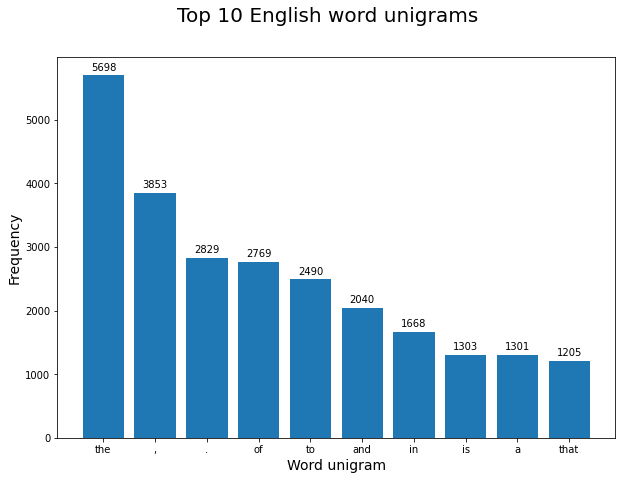

In [62]:
#Set lables and values as corresponding to top ten most frequent English unigrams
#Arrange indexes by length of labels and set height
labels, values = zip(*english_unigram_freqs[:10])
indexes = arange(len(labels))
width = 0.8 # width = 1 would give bars that overlap because they are too close.

#Size plot, axes and bars
fig = plt.figure(figsize=(10,7))                                                               
ax = fig.gca() # Get current axis
rects = ax.bar(indexes, values, width)

# Add title and axis labels
fig.suptitle('Top 10 English word unigrams', fontsize=20)
plt.xlabel('Word unigram', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Display value of each bar on bar
for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width() / 2., 50 + height, '%d' % int(height), ha='center', va='bottom') # Can also add color and fontweight arguments.

# Remove the default x-axis tick numbers and use tick numbers of your own choosing:
ax.set_xticks(indexes)
# Replace the tick numbers with strings:
ax.set_xticklabels(labels)

plt.show()
# plt.savefig('top10EnglishWordUnigrams.png')

Generating unigram and bigram frequencies for English, French and Italian from training files

In [ ]:
## DOES NOT RUN YET
def get_ngram_count_dict(tokens, n):
    if n == 1:
        n_grams = ngrams(tokens, n)
    else:
        n_grams = ngrams(tokens, n, pad_left=True, pad_right=True, left_pad_symbol='_', right_pad_symbol='_') # Fun fact: If I remove padding here and later when testing, and also remove the '_' from the unigram dicts, the accuracy rises slightly. However, it's not statistically significant due to the small size of the data.
    fdist = FreqDist(n_grams)
    ngram_dict = dict()
    for k,v in fdist.items():
        ngram_dict[' '.join(k)] = v
    return ngram_dict

# Calls get_ngram_count_dict to get a unigram and bigram dict from file.
def get_unigram_bigram_dicts(file):
    with open(file, encoding='utf8') as f:
        content = f.read()
    tokens = ultimate_tokenize(content)
    unigram_dict = get_ngram_count_dict(tokens, 1)     
    bigram_dict = get_ngram_count_dict(tokens, 2)     
    return (unigram_dict, bigram_dict)

# Dumps unigram and bigram dictionary of training data of given language to .pickle files.
def dump_pickle(language):
    file = 'ngram_langid_files/LangId.train.' + language + '.txt'
    unigram_dict, bigram_dict = get_unigram_bigram_dicts(file)
    with open('ngram_langid_files/' + language + '.unigram.pickle', 'wb') as handle:
        pickle.dump(unigram_dict, handle, protocol=pickle.HIGHEST_PROTOCOL) # HIGHEST_PROTOCOL instructs pickle to use the highest protocol version available.
    with open('ngram_langid_files/' + language + '.bigram.pickle', 'wb') as handle:
        pickle.dump(bigram_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)
        
dump_pickle('English')
dump_pickle('French')
dump_pickle('Italian')

Later, it will also be required to know how many sentences there are in the training data for each language. This is because of the method used to calculate probabilities (incorporating the probability of the bigram among other bigrams starting with the same word) and the fact we use padding for our bigrams.

In our training data each line is a sentence, which is very convenient for calculating the number of sentences.

We go ahead and get the number of sentences (for more efficiency, the following code could be added to get_unigram_bigram_dicts):

In [ ]:
with open('ngram_langid_files/LangId.train.English.txt', encoding='utf8') as f:
    for i, l in enumerate(f):
        pass
number_of_sents_en = i + 1
with open('ngram_langid_files/LangId.train.French.txt', encoding='utf8') as f:
    for i, l in enumerate(f):
        pass
number_of_sents_fr = i + 1
with open('ngram_langid_files/LangId.train.Italian.txt', encoding='utf8') as f:
    for i, l in enumerate(f):
        pass
number_of_sents_it = i + 1

print('NUMBER OF SENTENCES IN TRAINING DATA')
print('English:', number_of_sents_en)
print('French:', number_of_sents_fr)
print('Italian:', number_of_sents_it)

Identifying language for each line of the test file using bigram probabilities

In [ ]:
with open('ngram_langid_files/English.unigram.pickle', 'rb') as handle:
    unigram_english_dict = pickle.load(handle)
    
with open('ngram_langid_files/English.bigram.pickle', 'rb') as handle:
    bigram_english_dict = pickle.load(handle)
    
with open('ngram_langid_files/French.unigram.pickle', 'rb') as handle:
    unigram_french_dict = pickle.load(handle)
    
with open('ngram_langid_files/French.bigram.pickle', 'rb') as handle:
    bigram_french_dict = pickle.load(handle)
    
with open('ngram_langid_files/Italian.unigram.pickle', 'rb') as handle:
    unigram_italian_dict = pickle.load(handle)
    
with open('ngram_langid_files/Italian.bigram.pickle', 'rb') as handle:
    bigram_italian_dict = pickle.load(handle)
    
vocabulary_size = len(unigram_english_dict) + len(unigram_french_dict) + len(unigram_italian_dict)
vocabulary_size

In [ ]:
# Get probability of given bigram belonging to the language which bigram_dict is in
def get_bigram_probability(bigram, first_word, bigram_dict, first_word_dict): # first_word is the first word of the word bigram.
    bigram_count = bigram_dict.get(bigram)
    if bigram_count is None:
        bigram_count = 0
    
    first_word_count = first_word_dict.get(first_word)
    if first_word_count is None:
        first_word_count = 0
    
    return (bigram_count + 1) / (first_word_count + vocabulary_size) # To get the logic of this formula, note how the proability is used in the function below. Without the + 1 in the Nr, if you find a bigram which is not in our known bigrams for a language, the probability of it being in that language would become 0. So we would like to assign a small probability of 1 / vocabulary_size in that case. Also note the arbitrariness of this 'probability'. We're saying "Given a bigram and a language, what is the probability that the bigram is of that language?" This is arbitrary because to get a meaningful probability we need to know which are the other languages considered and what their bigram frequencies are. That would be another way to do it, but arguable a worse one because it wouldn't be able to give a confidence score for a particular language. The formula just uses common sense to get to a number which works for the purposes. In the denominator, we have both first_word_count and vocabulary_size. Why? We have vocabulary_size for all langs in the denom because the larger this is, the less significant it is that for this particular language the bigram appears so many times. Could we have used a vocab_size of bigrams instead of unigrams? Sure, and the 'probabilities' would end up being much smaller numbers. What about first_word_count? This gives us a way to compare this bigram against other bigrams in this language starting with the same word. In general though, for a given bigram, it's more important to consider how many times it exists than to consider whether it is the usual bigram given a certain first word. The formula achieves that. Take the bigram 'le monseiur' and the English language. Let's say the bigram appears once and 'le' also appears once, while in French 'le monseiur' appears 100 times and le appears 100,000 times. Probability for English = (1 + 1) / (1 + 20,000) = 0.000099995. Probability for French = (100 + 1) / (100,000 + 20,000) = 0.00084166666. Note how the probability for French is still low because 100/100,000 is quite low and maybe it's not French after all if in French le is usually followed by other words. However, it's still significantly higher than the probability for English where both 'le' and 'le monseiur' only appear once.

# Get probability that a given bigram list is of a language (specified by its bigram_dict)
def get_language_probability(bigram_list, first_words, bigram_dict, first_word_dict):
    result = 1.0
    index = 0
    for bigram in bigram_list:
        result *= get_bigram_probability(bigram, first_words[index], bigram_dict, first_word_dict)
        index += 1
    return result

# Load correct solutions
solution_dict = dict()
with open('ngram_langid_files/LangId.sol.txt') as f:
    for line in f:
       (key, val) = line.split()
       solution_dict[int(key)] = val
        
line_no = 1
result_dict = dict()
correct = 0
incorrect_line_numbers = []

# This needs to be done because I'm using padding for bigrams so the unigram dicts in their raw forms can't be used in get_bigram_probability():
unigram_english_dict['_'] = number_of_sents_en
unigram_french_dict['_'] = number_of_sents_fr
unigram_italian_dict['_'] = number_of_sents_it

with open('ngram_langid_files/LangId.test.txt', encoding='utf8') as f:
    for line in f:
        tokens = ultimate_tokenize(line)
        bigrams = ngrams(tokens, 2, pad_left=True, pad_right=True, left_pad_symbol='_', right_pad_symbol='_')
        bigram_list = [] # bigram_list will be exactly like bigrams but instead of [('_', 'this'), ...] it will be ['_ this', ...]. It is required because this is how bigrams are represented in the dictionary.
        first_words = [] # The first words of each bigram. This is the similar to making a unigram_list. We use it because we don't want something in the form [(this,), ...]. Also because we want this to include '_'. We want it to include '_' because we're not using the unigrams for classification but as part of a formula to judge bigram frequency based on the starting word.
        for b in bigrams:
            bigram_list.append(' '.join(b))
            first_words.append(b[0])
        
        english_prob = get_language_probability(bigram_list, first_words, bigram_english_dict, unigram_english_dict)
        french_prob = get_language_probability(bigram_list, first_words, bigram_french_dict, unigram_french_dict)
        italian_prob = get_language_probability(bigram_list, first_words, bigram_italian_dict, unigram_italian_dict)
        
        max_prob = max(english_prob, french_prob, italian_prob)
        if max_prob == english_prob:
            result_dict[line_no] = 'English'
        elif max_prob == french_prob:
            result_dict[line_no] = 'French'
        else:
            result_dict[line_no] = 'Italian'
        
        if solution_dict[line_no] == result_dict[line_no]:
            correct += 1
        else:
            incorrect_line_numbers.append(line_no)
            
        line_no += 1

# Storing results from result_dict to file:
with open('ngram_langid_files/LangId.result.txt', 'w') as f:
    for (key, val) in result_dict.items():
        f.write(' '.join([str(key), val]) + '\n')
        
print('Accuracy: {:2.2f}%'.format(correct * 100 / len(solution_dict)))

In [ ]:
print('Line numbers for incorrectly classified languages: {}'.format(str(incorrect_line_numbers)))


Testing with our own sentence

In [ ]:
sent = "This is a sentence."
sent_tokens = ultimate_tokenize(sent)
sent_bigrams_pre = ngrams(sent_tokens, 2, pad_left=True, pad_right=True, left_pad_symbol='_', right_pad_symbol='_')
sent_bigrams = []
sent_bigrams_first_words = []
for b in sent_bigrams_pre:
    sent_bigrams.append(' '.join(b))
    sent_bigrams_first_words.append(b[0])
print('Sentence bigrams:', sent_bigrams)
print('Sentence bigrams first words:', sent_bigrams_first_words)

In [ ]:
sent_english_prob = get_language_probability(sent_bigrams, sent_bigrams_first_words, bigram_english_dict, unigram_english_dict)
sent_french_prob = get_language_probability(sent_bigrams, sent_bigrams_first_words, bigram_french_dict, unigram_french_dict)
sent_italian_prob = get_language_probability(sent_bigrams, sent_bigrams_first_words, bigram_italian_dict, unigram_italian_dict)
print("RAW 'PROBABILITIES'")
print('English:', sent_english_prob)
print('French:', sent_french_prob)
print('Italian:', sent_italian_prob)
# As we can see, these 'probabilities' are arbitrary. We can try to convert them to percentages since we are classifying only among these 3 languages:

In [ ]:
def get_normalized_probabilities(list_of_probabilities):
    sum_of_probabilities = sum(list_of_probabilities)
    result = []
    for probability in list_of_probabilities:
        result.append(probability / sum_of_probabilities)
    return result

probabilities = [sent_english_prob, sent_french_prob, sent_italian_prob]
normalized_probabilities = get_normalized_probabilities(probabilities)

print('RELATIVE PROBABILITIES')
print('English: ', round(normalized_probabilities[0] * 100, 2), '%', sep='') # I use sep because I don't want a space before the % sign.
print('French: ', round(normalized_probabilities[1] * 100, 2), '%', sep='')
print('Italian: ', round(normalized_probabilities[2] * 100, 2), '%', sep='')


PS: For a state-of-the-art Greek dialect classifier using n-grams, take a look at [Greek Dialect Classifier.](https://github.com/hb20007/greek-dialect-classifier)
